- Module Code: CS3PP19
- Assignment Report Title: Python Programming For Data Science: Individual Project
- Student Number: 26011298
- Date (when the work is completed): 04/12/2020
- Actual hours spent for the assignment: ~20 Hours
- Assignment Evaluation:
  - Really enjoyed this coursework. The lectures were very helpful when completing the coursework

# Python Programming For Data Science: Individual Coursework

## Task 1

- Load the metro.cvs file into a Pandas data frame.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
metro = pd.read_csv("Datasets/metro.csv")

C:\Users\Will\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


* Find a sensible way to remove the missing values from the data frame

In [3]:
metro2 = metro.dropna().copy()
metro2.isnull().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64

**Explanation** : `metro.isnull().sum()` showed that the only columns that had missing values were start_lat , start_lon, end_lat, end_lon. `metro.loc[metro.isnull()['start_lat'], 'start_station'].unique()` showed that the start_station ids missing are 3000, 4285 and 4286. `metro.loc[metro.isnull()['end_lat'], 'end_station'].unique()` shows that the end_station ids missing are the same as the start_station ids. 

When putting these IDs (as station_id) into `metro.loc[metro['start_station'] == station_id, 'start_lat'].unique()`, only `nan` is returned, therefore there is no way of finding the missing data from other rows. 

Due to this, dropping the rows seems the most sensible way to remove the missing values.

- Explore the distribution of the duration variable. You should produce a plot visualising the distribution and calculate and briefly discuss statistics of the variable

count    86760.000000
mean        26.996404
std         95.720579
min          1.000000
25%          6.000000
50%         11.000000
75%         21.000000
95%         68.000000
99%        309.410000
max       1440.000000
Name: duration, dtype: float64

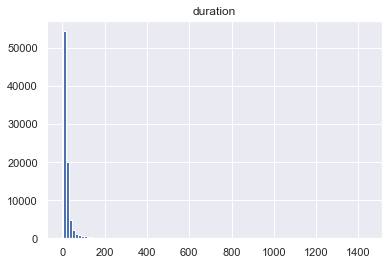

In [4]:
metro2.hist(column='duration', bins=100)
metro2['duration'].describe(percentiles=[.25, .5, .75, .95, .99])

**Explanation:** The plot shows a histogram of the variable 'duration', with the statistics of the variable above it. We can see that 86760 rows were read in; the average of those rows is ~27.0. 50% of the bike journeys were 11 minutes or less in duration, 75% were 21 minutes or less. The maximum bike journey was 1440 minutes (or 24 hours), which may be indication of an outlier or false data.

I chose `bins=100` as I felt it gave a good indication of the amount of journeys that took a smaller amount of time, compared to journeys taking longer. I also added the 95% and 99% percentiles to the `describe()` function as I feel it gives a very good indication of the exponential drop off of journeys above about 70 minutes.

The `std` of the duration variable is only ~96 minutes, however that's a good indicator of the signficance of the outliers to the data. 

- Produce a plot showing how the distribution of duration relates to _passholder\_type_

                   count       mean         std  min   25%   50%   75%     max
passholder_type                                                               
Annual Pass       5966.0  13.066711   60.286274  1.0   5.0   8.0  13.0  1440.0
Flex Pass            6.0   7.333333    1.366260  5.0   7.0   7.5   8.0     9.0
Monthly Pass     55904.0  15.012843   47.032037  1.0   5.0   9.0  17.0  1440.0
One Day Pass      3599.0  79.005835  171.922712  1.0  14.0  29.0  76.0  1440.0
Testing             27.0  26.740741   56.253952  1.0   2.0   7.0  28.5   292.0
Walk-up          21258.0  53.620566  154.766793  1.0  11.0  21.0  41.0  1440.0


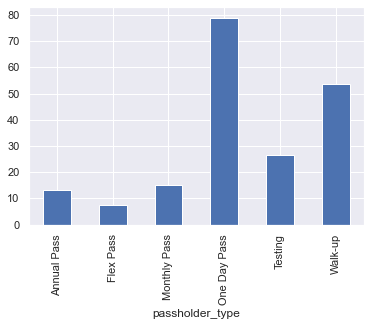

In [5]:
print(metro2.groupby("passholder_type")['duration'].describe())
metro2.groupby("passholder_type")['duration'].mean().plot(kind="bar")

**Explanation** : The above plot shows how the average duration fo a bike ride is different depending on the passholder type. It can be seen that One-Day Pass holders are likely to have a much longer bike ride, at ~79 minutes, with the second longest rides on average being from people with 'Walk-Up' passes at around ~54 minutes. It was decided that a bar chart would be used as the `passholder_type` represents categorical data.

- Convert the _start\_time_ and _end\_time_ columns to date objects if they are not already

In [6]:
metro2['start_time'] = pd.to_datetime(metro2['start_time'])
metro2['end_time'] = pd.to_datetime(metro2['end_time'])
metro2.head()

trip_id  duration          start_time            end_time  start_station  \
0  124657107         5 2019-07-01 00:04:00 2019-07-01 00:09:00           4312   
1  124657587         9 2019-07-01 00:07:00 2019-07-01 00:16:00           3066   
2  124658068         5 2019-07-01 00:20:00 2019-07-01 00:25:00           4410   
3  124659747        20 2019-07-01 00:44:00 2019-07-01 01:04:00           3045   
4  124660227        27 2019-07-01 00:44:00 2019-07-01 01:11:00           3035   

   start_lat   start_lon  end_station    end_lat     end_lon bike_id  \
0  34.066990 -118.290878         4410  34.063351 -118.296799    6168   
1  34.063389 -118.236160         3066  34.063389 -118.236160   17584   
2  34.063351 -118.296799         4312  34.066990 -118.290878   18920   
3  34.028511 -118.256668         4275  34.012520 -118.285896    6016   
4  34.048401 -118.260948         3049  34.056969 -118.253593    5867   

   plan_duration trip_route_category passholder_type bike_type  
0             30             One Way    Monthly Pass  standard  
1             30          Round Trip    Monthly Pass  electric  
2             30             One Way    Monthly Pass  electric  
3              1             One Way         Walk-up  standard  
4             30             One Way    Monthly Pass  standard

- Create a new column in the data frame that gives the hour of the day that each journey was started on

In [7]:
metro2['start_hour']= metro2['start_time'].dt.hour
metro2.head()

trip_id  duration          start_time            end_time  start_station  \
0  124657107         5 2019-07-01 00:04:00 2019-07-01 00:09:00           4312   
1  124657587         9 2019-07-01 00:07:00 2019-07-01 00:16:00           3066   
2  124658068         5 2019-07-01 00:20:00 2019-07-01 00:25:00           4410   
3  124659747        20 2019-07-01 00:44:00 2019-07-01 01:04:00           3045   
4  124660227        27 2019-07-01 00:44:00 2019-07-01 01:11:00           3035   

   start_lat   start_lon  end_station    end_lat     end_lon bike_id  \
0  34.066990 -118.290878         4410  34.063351 -118.296799    6168   
1  34.063389 -118.236160         3066  34.063389 -118.236160   17584   
2  34.063351 -118.296799         4312  34.066990 -118.290878   18920   
3  34.028511 -118.256668         4275  34.012520 -118.285896    6016   
4  34.048401 -118.260948         3049  34.056969 -118.253593    5867   

   plan_duration trip_route_category passholder_type bike_type  start_hour  
0             30             One Way    Monthly Pass  standard           0  
1             30          Round Trip    Monthly Pass  electric           0  
2             30             One Way    Monthly Pass  electric           0  
3              1             One Way         Walk-up  standard           0  
4             30             One Way    Monthly Pass  standard           0

- Explore how the duration variable varies between each journey starting hour, create a plot to visualise this

start_hour
0     40.259728
1     38.680885
2     41.117207
3     89.412587
4     25.468208
5     22.489796
6     14.301318
7     12.750850
8     17.489366
9     27.377243
10    34.113819
11    31.910959
12    28.444252
13    30.123332
14    30.538524
15    28.897214
16    28.020800
17    22.669076
18    27.223457
19    26.462032
20    27.599166
21    25.122571
22    29.826735
23    29.830389
Name: duration, dtype: float64


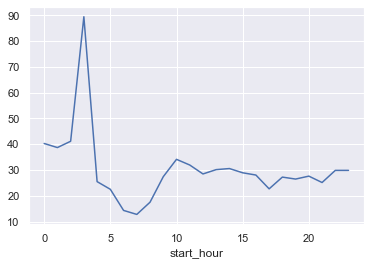

In [8]:
print(metro2.groupby(metro2['start_hour'])['duration'].mean())
metro2.groupby(metro2['start_hour'])['duration'].mean().plot()

**Explanation:** The above graph shows the average duration of a bike ride for any given start_hour. It can be seen that generally bike rides that start early in the morning (~3:00), will last significally longer than bike rides starting at any other time. Conversely, bike rides that start at around 6:00-7:00 will last significantly shorter, at only around ~15 minutes. 

- Explore the distribution of the bike type. What kind of bike is more popular?

In [9]:
metro2['bike_type'].value_counts()

electric    45818
standard    28966
smart       11976
Name: bike_type, dtype: int64

**Explanation:** The Electric bike is most popular.

- Explore how the distribution of the duration variable varies between each day of the week and by bike type, creating plots to visualise this. Discuss the results

start_time
0    22.962876
1    23.179478
2    24.569557
3    25.925463
4    23.647350
5    34.664733
6    37.838966
Name: duration, dtype: float64


bike_type
electric    24.347855
smart       41.520792
standard    25.180729
Name: duration, dtype: float64


Text(0, 0.5, 'Mean Duration')

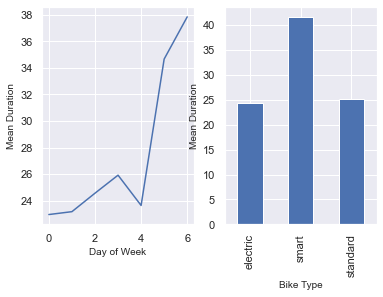

In [10]:
# The dt.dayofweek function returns the day of the week by reading the date of the datetime project
print(metro2.groupby(metro2['start_time'].dt.dayofweek)['duration'].mean())
print('\n') # Formatting
print(metro2.groupby(metro2['bike_type'])['duration'].mean())
plt.subplot(1,2,1)
metro2.groupby(metro2['start_time'].dt.dayofweek)['duration'].mean().plot()
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Mean Duration', fontsize=10)
plt.subplot(1,2,2)
metro2.groupby(metro2['bike_type'])['duration'].mean().plot(kind='bar')
plt.xlabel('Bike Type', fontsize=10)
plt.ylabel('Mean Duration', fontsize=10)

**Explanation:** It can be seen that when plotting the avergage duration of a trip against the day of week the trip starts on, the mean duration of the rides increase significantly on the day '5' and '6' which refers to Saturday and Sunday in the week.

When plotting the average duration against the different bike types, it can be seen that on average, people using 'smart' bikes will have a longer duration trip of about ~15 more minutes.People using 'electric' and 'standard' bikes have (on average) a trip of ~25 minutes.

- Calculate the total numbers of passholders of each type travelling on each weekday. Discuss the results.

In [11]:
metro2.groupby(metro2['start_time'].dt.dayofweek)['passholder_type'].value_counts()

start_time  passholder_type
0           Monthly Pass       9153
            Walk-up            2692
            Annual Pass         989
            One Day Pass        360
            Testing               4
            Flex Pass             1
1           Monthly Pass       9370
            Walk-up            2782
            Annual Pass        1027
            One Day Pass        374
            Testing               3
2           Monthly Pass       8933
            Walk-up            2575
            Annual Pass        1039
            One Day Pass        423
            Testing               5
3           Monthly Pass       8812
            Walk-up            3020
            Annual Pass         937
            One Day Pass        439
            Flex Pass             4
            Testing               3
4           Monthly Pass       8500
            Walk-up            2998
            Annual Pass         953
            One Day Pass        455
            Flex Pass             1


**Explanation:** Everyday, the most popular passholder_type is the Monthly Pass, followed by the walk up pass. In the weekdays, the Annual Pass is the third popular followed by the one day pass. On the weekends, the one day pass is 3rd most popular, with the Annual Pass 4th. Only on Monday, Thursday and Friday does anyone use the Flex Pass; On Monday the Flex Pass is least popular, having 3 less tahn the Testing pass. On Thursday the Flex pass has one more than the testing Pass, and on Friday the Flex pass and the Testing pass have an equal amount of uses with 1.

## Task 2 - Data Clustering - Seed Shape Data

- Load the seeds.csv file into a Pandas data frame.

In [12]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

seeds = pd.read_csv('Datasets/seeds.csv')
seeds.head()

area  perimeter  compactness  length  width  asymmetry  groove length
0  15.26      14.84        0.871   5.763  3.312      2.221          5.220
1  14.88      14.57        0.881   5.554  3.333      1.018          4.956
2  14.29      14.09        0.905   5.291  3.337      2.699          4.825
3  13.84      13.94        0.895   5.324  3.379      2.259          4.805
4  16.14      14.99        0.903   5.658  3.562      1.355          5.175

- Explore the data, and find a way to cluster the seeds implementing one of the algorithms provided in the lectures. Visualise the results and explain why you have applied the method you have used

### K-Means Model ###


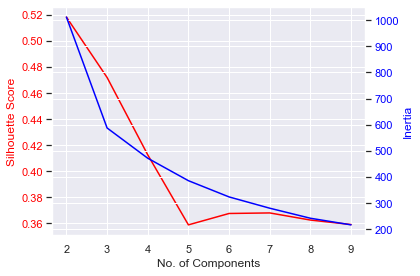

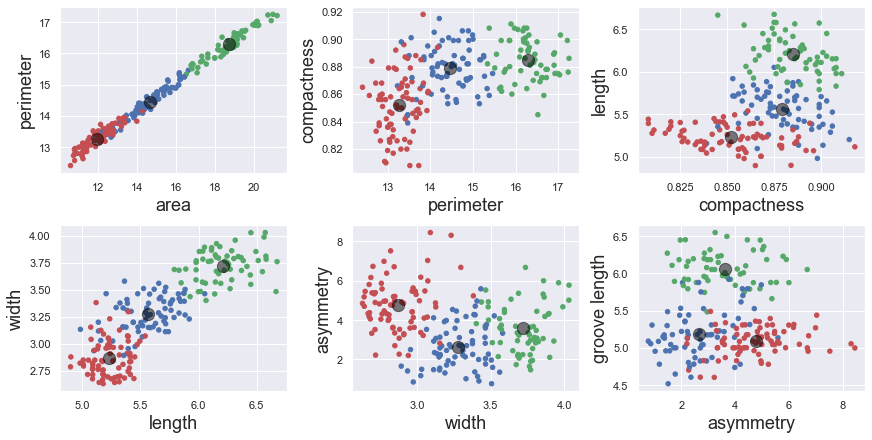

### Guassian Model ###


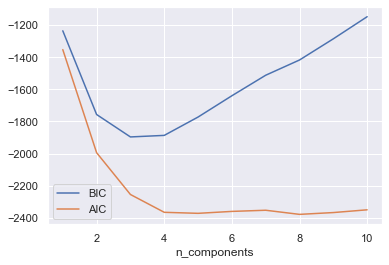

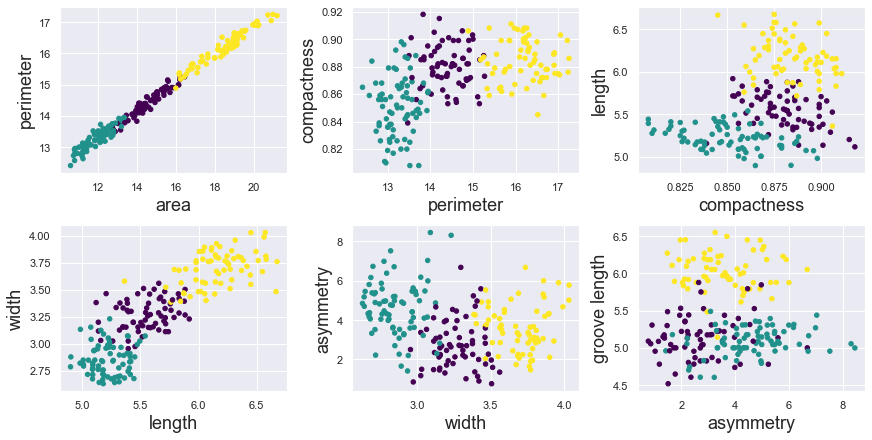

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

column_no=len(seeds.columns)

####################
# KMeans Algorithm #
####################

print("### K-Means Model ###")

##########################
# Calc No. of components #
##########################

sampleset=seeds.values

inertia = []
s_score = []
for k in range(2,10):   # Testing the inertia / S_score for varying no of components
    km = KMeans(n_clusters=k)
    km = km.fit(sampleset)
    inertia.append(km.inertia_)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sampleset)
    s_score.append(silhouette_score(sampleset, kmeans.labels_))
    
fig, ax1 = plt.subplots()

ax1.set_xlabel('No. of Components')
ax1.set_ylabel('Silhouette Score', color='red')
ax1.plot(range(2,10), s_score, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel('Inertia', color='blue')
ax2.plot(range(2,10), inertia, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.show()

#######################
# Create KMeans model #
#######################

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(sampleset)
y_kmeans = kmeans.predict(sampleset)

################################
# Visualise the clustered data #
################################

fig, axs = plt.subplots(2,3, figsize=(12,6), constrained_layout=True)
centers = kmeans.cluster_centers_

# Use of a colourmap so points under centre is still easily visible
colourmap=np.array(['r','g','b'])

# For multi-dimensions, plot the graphs and the centre points
for i in range(column_no-1):
    coords = divmod(i,3)
    axs[coords[0], coords[1]].scatter(sampleset[:,i], sampleset[:,i+1], c=colourmap[y_kmeans], s=20, cmap='viridis')
    axs[coords[0], coords[1]].scatter(centers[:,i], centers[:,i+1], c='black', s=150, alpha=0.5)
    axs[coords[0], coords[1]].set_xlabel(seeds.columns.values[i], fontsize=18)
    axs[coords[0], coords[1]].set_ylabel(seeds.columns.values[i+1], fontsize=18)
    
plt.show()

######################
# Guassian Algorithm #
######################
    
#############
# AIC & BIC #
#############

print("### Guassian Model ###")

from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 11)

fig = plt.subplots()
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(sampleset) for n in n_components]
plt.plot(n_components, [m.bic(sampleset) for m in models], label='BIC')
plt.plot(n_components, [m.aic(sampleset) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

#########################
# Create Guassian Model #
#########################

gmm = GaussianMixture(n_components=3)
gmm.fit(sampleset)
labels = gmm.predict(sampleset)

#####################
# Visualise results #
#####################

fig, axs = plt.subplots(2,3, figsize=(12,6), constrained_layout=True)

for i in range(column_no-1):
    coords = divmod(i,3)
    axs[coords[0], coords[1]].scatter(sampleset[:,i], sampleset[:,i+1], c=labels, s=20, cmap='viridis')
    axs[coords[0], coords[1]].set_xlabel(seeds.columns.values[i], fontsize=18)
    axs[coords[0], coords[1]].set_ylabel(seeds.columns.values[i+1], fontsize=18)
    
plt.show()
    

I decided to implement both the K-Means and the Guassian Mixture model algorithm, as on initial inspection, I was unable to see a discernible reason why one is preferable over the other. 

Regarding the KMeans algorithm, the inertia and silouette score was calculated to get determine the optimal number of components. Unfortunately, there wasn't a very obvious optimal number of components, however K was determined to be 3.
This was due to a number of reasons. When visualing the groove length against the asymettry (the bottom right diagram), K = 3 looked fairly sensible - I picked these 2 aspects, as the groove length and asymmetry are not correlated in any way, however most other aspects of the seeds would be (i.e. perimeter and area), therefore it'd be easier to see the clusters.
In addition, when the interita graph was found, it can be seen that the interia starts decreasing at a lower rate after K = 3. On the silouhette chart, the score at K = 3 was also fairly high.

The Guassian Mixture model shows the AIC and the BIC plotted to determine the optimal number of components. Again, the graphs shown doesn't display an obvious optimal number, giving both K=3 and k=4 to be reasonable answers. K = 3 was opted for, as it would show the comparison between algorithms better.

Due to the data presented, there isn't necessarily an algorithm that's preferable to cluster this data. As the data is multi-dimensional, these algorithms have a hard time of accurately predicting and clustering the data. This is also why visualisations of several dimensions of the data have been given.

## Task 3 - Social Network Analysis

- Using the library Networkx, load the social network data from the social-network.csv file.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

network=nx.read_edgelist('Datasets/social-network.csv', delimiter=',')
network.number_of_nodes()
# Number of nodes = 2888 which is the expected number, according to spec

2888

- Produce a visualisation of the network topology and discuss the output.

Diameter: 9


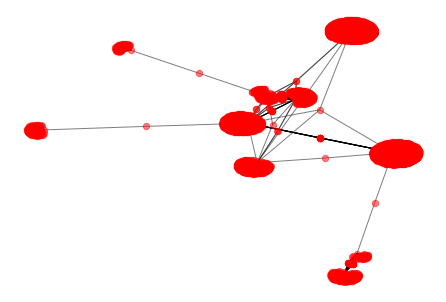

In [2]:
nwork_vis=network
# Using a spring layout for a force-directed graph
# Iterations refer to the amount of times the edge-forces are applied. I.e. higher number = bigger groups are more spread out
layout=nx.spring_layout(nwork_vis, iterations=80)
nx.draw(nwork_vis,pos=layout,node_size=40,alpha=0.5, node_color='red')
print("Diameter:" ,nx.diameter(network))

**Explanation:** It can be seen with the given output that nodes are generally clustered into groups that will primarily interact with each other. This results in a graph with individual blobs. With the slightly higher increased 'iterations', it excentuates the distance between the blobs; therefore, the more edges between nodes in differing blobs, the closer the blobs are in the visualisation of the graph.

- Calculate statistics of the network, plot them where relevant and discuss the results, explaining the meaning of any statistics you have calculated.

Name: 
Type: Graph
Number of nodes: 2888
Number of edges: 2981
Average degree:   2.0644
Is graph connected?:  True

Additional Metrics:
Density:  0.0007150690793671507
Diameter:  9
Triadic_Closure:  0.0003593802862141459
Assortativity:  -0.6682140067239861 


Top 20 Nodes sorted by degrees:
('603', 769)
('1525', 710)
('288', 481)
('1', 287)
('710', 221)
('2687', 170)
('714', 139)
('2232', 97)
('2536', 58)
('2699', 55)
('247', 4)
('716', 4)
('719', 4)
('71', 3)
('711', 3)
('720', 3)
('35', 2)
('69', 2)
('90', 2)
('217', 2)

Average Clustering Coeff:  0.027247421431211827

Average Betweenness Centrality: 0.000993562457120087

The Top 25 nodes with Highest Centrality

('603', 0.5497065448918781)
('288', 0.46612992918844975)
('1525', 0.4294450041419194)
('247', 0.24124220674273653)
('1', 0.1860965105682874)
('2699', 0.13099957488596214)
('1524', 0.13019147414713747)
('710', 0.12724689931998354)
('714', 0.11276804568283787)
('2687', 0.09928765193746143)
('2232', 0.06541043188081637)
('335',

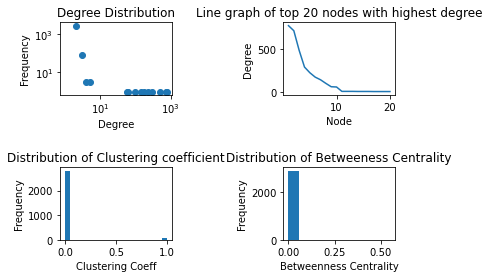

In [3]:
from operator import itemgetter

print(nx.info(network))
print("Is graph connected?: ",nx.is_connected(network))

### Network Density / Diameter / Triadic Closure / Assortativity

density=nx.density(network)
diameter=nx.diameter(network)
triadic_closure=nx.transitivity(network)
assortativity=nx.degree_assortativity_coefficient(network)

print("\nAdditional Metrics:")
print("Density: ", density)
print("Diameter: ", diameter)
print("Triadic_Closure: ", triadic_closure)
print("Assortativity: ", assortativity, "\n")

### Degree Distribution ###

degree_list=sorted(dict(network.degree(network.nodes())).items(), key=itemgetter(1), reverse=True)

plt.subplot(221)
plt.loglog(range(1,len(nx.degree_histogram(network))+1),nx.degree_histogram(network),'o') # This one works really well to show how only very few nodes have a large amount of connections
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")

print("\nTop 20 Nodes sorted by degrees:") 
for d in degree_list[:20]:
      print(d)

x_val=[d[1] for d in degree_list[:20]]

plt.subplot(222)
plt.subplots_adjust(wspace=1, hspace=1)
plt.plot(range(1,21),x_val)
plt.xlabel("Node")
plt.ylabel("Degree")
plt.title("Line graph of top 20 nodes with highest degree")

### Plot the distribution of Clustering Coefficient ###

clustering = nx.clustering(network)
plt.subplot(223)
plt.hist(list(clustering.values()),bins=20)
plt.ylabel("Frequency")
plt.xlabel("Clustering Coeff")
plt.title("Distribution of Clustering coefficient")
print("\nAverage Clustering Coeff: ", nx.average_clustering(network))

### Plot the Betweenness Centrality ####

centrality=nx.betweenness_centrality(network)
plt.subplot(224)
plt.hist(list(centrality.values()),bins=10)
plt.ylabel("Frequency")
plt.xlabel("Betweenness Centrality")
plt.title("Distribution of Betweeness Centrality")
print("\nAverage Betweenness Centrality:", sum(centrality.values())/len(centrality))

centrality_list = sorted(centrality.items(), key=itemgetter(1), reverse=True)[:25]
print("\nThe Top 25 nodes with Highest Centrality\n")
for x in centrality_list:
    print(x)


#### Additional Metrics: 
The additional metrics show various values that can't be necessarily plot. The density is a measure of number of actual edges to the number of all possible edges. The density of this graph is very low, with an average density of 2.0644 per node, meaning the graph is quite widely distributed.

The diameter relates to the longest path that can be made in the graph, and can be found to give a sense of the overall size of the network, however this can only be found if the graph is connected (i.e. there is a single component). With a diameter of 9, the network is fairly large, and is connected.

The triadic closure of the graph is a measure of the amount of triangles made between 3 nodes, over the amount of possible triangles. This is an expression of how interconnected the graph is, and with such a low value, our network isn't very well connected, pointing to few individual nodes having a high degree, with the majority having low degrees.

The assortativity of the graph is a measure of how strong the tendency for nodes to interact with similar nodes are, by measuring the coreelation of nodes degrees with interacting edges. This graph has a relatively high value for this, meaning there's a high chance nodes of similar degrees will interact with other nodes of the same degree. This correlates with what we found before, where most nodes are similar (i.e. have low degrees).

#### Degree Distribution / Node Degree Line graph

The frequency degree distribution confirms what was suspected above, with very few nodes having very high degrees (>50), and most having low degrees
(>5). This is further confirmed with the line graph plotting the top 20 nodes, sorted by degrees; only 10 nodes have a degree of higher than 10, and there is an exponential decrease from the 1st node to the 11th node in the list, after which the degree value stays consistently low (<=4). These 10 nodes are most likely the 'hubs' of the network- the centre of the blobs in the visualisation shown above. 

#### Clustering Coefficient:

The clustering coefficient relates to the triadic closure of the graph, however is specific to a single node, in that, the clustering coefficient is the fraction of possible triangles going through that node. The distribution shows that the vast majority of nodes have a coefficient of <0.05 (most of these are actually 0), with the second largest group being >=0.95 (most of these being 1). This is consistent with what we found before, of most nodes not being interconnected, however the nodes that are the hubs (or closely around the hubs), are all highly interconnected.

#### Betweenness Centrality:

The betweenness centrality of a node correlates to the ratio of shortest paths that go through the node, so this isn't affected by the degree of each node. The list shows that all except 9 nodes fall below the 0.1 centrality- this is reflected in the distribution which shows effectively that no nodes are out of the 0<=0.1 boundary. The nodes with a high betweenness centrality aren't necessarily the ones with the highest degrees, but in this case, a lot of them are, and these are important nodes as they act as connections between otherwise unconnected groups. The very low average betweenness centrality demonstrates the scale of the network, in addition to the high amount of branching paths.

**Note**
The following resources were used to answer this task:
https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#metrics-available-in-networkx